## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  96.387228   686.042593  0.083383  5.267698  0.603556
1  99.684678  1053.450608  0.218543  7.613234  1.152452
2  53.058175   765.814274  0.044803  4.464193  0.561359
3  99.321271   208.104530  0.559269  6.135839  0.754502
4  30.687201  1702.974609  0.657723  4.911031  1.619543


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.03951 | train_mse: 4.92565 | train_mae: 1.64828 |  0:00:00s
epoch 1  | loss: 0.8385  | train_mse: 3.68568 | train_mae: 1.44189 |  0:00:00s
epoch 2  | loss: 0.77779 | train_mse: 2.90892 | train_mae: 1.31228 |  0:00:00s


epoch 3  | loss: 0.78998 | train_mse: 2.3599  | train_mae: 1.21353 |  0:00:00s
epoch 4  | loss: 0.79536 | train_mse: 1.98949 | train_mae: 1.11419 |  0:00:00s
epoch 5  | loss: 0.68052 | train_mse: 1.67852 | train_mae: 1.03403 |  0:00:00s


epoch 6  | loss: 0.7955  | train_mse: 1.41613 | train_mae: 0.95065 |  0:00:00s
epoch 7  | loss: 0.72639 | train_mse: 1.2385  | train_mae: 0.88182 |  0:00:00s
epoch 8  | loss: 0.59746 | train_mse: 1.09248 | train_mae: 0.83797 |  0:00:01s


epoch 9  | loss: 0.60729 | train_mse: 1.02093 | train_mae: 0.81291 |  0:00:01s
epoch 10 | loss: 0.50394 | train_mse: 0.90595 | train_mae: 0.76985 |  0:00:01s


epoch 11 | loss: 0.48268 | train_mse: 0.79698 | train_mae: 0.71714 |  0:00:01s
epoch 12 | loss: 0.54539 | train_mse: 0.74172 | train_mae: 0.69853 |  0:00:01s


epoch 13 | loss: 0.57688 | train_mse: 0.70753 | train_mae: 0.683   |  0:00:01s
epoch 14 | loss: 0.50982 | train_mse: 0.67557 | train_mae: 0.66914 |  0:00:01s


epoch 15 | loss: 0.58091 | train_mse: 0.6356  | train_mae: 0.64347 |  0:00:01s
epoch 16 | loss: 0.40172 | train_mse: 0.59581 | train_mae: 0.61601 |  0:00:02s


epoch 17 | loss: 0.38115 | train_mse: 0.56986 | train_mae: 0.59849 |  0:00:02s
epoch 18 | loss: 0.48546 | train_mse: 0.55688 | train_mae: 0.59185 |  0:00:02s
epoch 19 | loss: 0.49757 | train_mse: 0.53606 | train_mae: 0.57948 |  0:00:02s


epoch 20 | loss: 0.57704 | train_mse: 0.52249 | train_mae: 0.57057 |  0:00:02s


epoch 21 | loss: 0.43803 | train_mse: 0.51182 | train_mae: 0.5662  |  0:00:02s
epoch 22 | loss: 0.45341 | train_mse: 0.49612 | train_mae: 0.55584 |  0:00:02s


epoch 23 | loss: 0.56314 | train_mse: 0.4854  | train_mae: 0.54876 |  0:00:02s
epoch 24 | loss: 0.47806 | train_mse: 0.47747 | train_mae: 0.54083 |  0:00:03s


epoch 25 | loss: 0.39787 | train_mse: 0.46662 | train_mae: 0.53077 |  0:00:03s
epoch 26 | loss: 0.4188  | train_mse: 0.45591 | train_mae: 0.52126 |  0:00:03s


epoch 27 | loss: 0.3426  | train_mse: 0.44646 | train_mae: 0.5155  |  0:00:03s
epoch 28 | loss: 0.38488 | train_mse: 0.43234 | train_mae: 0.50823 |  0:00:03s


epoch 29 | loss: 0.36192 | train_mse: 0.41958 | train_mae: 0.50189 |  0:00:03s
epoch 30 | loss: 0.3925  | train_mse: 0.40863 | train_mae: 0.49465 |  0:00:03s


epoch 31 | loss: 0.39888 | train_mse: 0.40112 | train_mae: 0.48872 |  0:00:04s
epoch 32 | loss: 0.39411 | train_mse: 0.38351 | train_mae: 0.47887 |  0:00:04s


epoch 33 | loss: 0.41738 | train_mse: 0.36413 | train_mae: 0.47082 |  0:00:04s


epoch 34 | loss: 0.31948 | train_mse: 0.3564  | train_mae: 0.4646  |  0:00:04s
epoch 35 | loss: 0.30294 | train_mse: 0.34616 | train_mae: 0.45665 |  0:00:04s


epoch 36 | loss: 0.35368 | train_mse: 0.3415  | train_mae: 0.45394 |  0:00:04s
epoch 37 | loss: 0.27996 | train_mse: 0.3251  | train_mae: 0.44364 |  0:00:05s
epoch 38 | loss: 0.28317 | train_mse: 0.30981 | train_mae: 0.43209 |  0:00:05s


epoch 39 | loss: 0.27081 | train_mse: 0.30045 | train_mae: 0.42408 |  0:00:05s
epoch 40 | loss: 0.32381 | train_mse: 0.28402 | train_mae: 0.41371 |  0:00:05s
epoch 41 | loss: 0.30162 | train_mse: 0.2716  | train_mae: 0.40439 |  0:00:05s


epoch 42 | loss: 0.25724 | train_mse: 0.26338 | train_mae: 0.39966 |  0:00:05s
epoch 43 | loss: 0.29682 | train_mse: 0.25849 | train_mae: 0.39552 |  0:00:05s


epoch 44 | loss: 0.36344 | train_mse: 0.25666 | train_mae: 0.39508 |  0:00:05s
epoch 45 | loss: 0.30774 | train_mse: 0.25589 | train_mae: 0.39396 |  0:00:05s
epoch 46 | loss: 0.26841 | train_mse: 0.25623 | train_mae: 0.39378 |  0:00:05s


epoch 47 | loss: 0.29181 | train_mse: 0.26399 | train_mae: 0.39742 |  0:00:05s
epoch 48 | loss: 0.29911 | train_mse: 0.25591 | train_mae: 0.39694 |  0:00:06s
epoch 49 | loss: 0.31721 | train_mse: 0.2732  | train_mae: 0.40946 |  0:00:06s


epoch 50 | loss: 0.35632 | train_mse: 0.26834 | train_mae: 0.40906 |  0:00:06s
epoch 51 | loss: 0.25072 | train_mse: 0.27519 | train_mae: 0.40883 |  0:00:06s
epoch 52 | loss: 0.22785 | train_mse: 0.27613 | train_mae: 0.40848 |  0:00:06s


epoch 53 | loss: 0.30755 | train_mse: 0.27059 | train_mae: 0.40329 |  0:00:06s
epoch 54 | loss: 0.33518 | train_mse: 0.26912 | train_mae: 0.40069 |  0:00:06s


epoch 55 | loss: 0.25978 | train_mse: 0.22509 | train_mae: 0.38815 |  0:00:06s
epoch 56 | loss: 0.40964 | train_mse: 0.21931 | train_mae: 0.38266 |  0:00:06s
epoch 57 | loss: 0.25288 | train_mse: 0.21489 | train_mae: 0.37881 |  0:00:06s


epoch 58 | loss: 0.34942 | train_mse: 0.20449 | train_mae: 0.36897 |  0:00:06s
epoch 59 | loss: 0.40555 | train_mse: 0.20537 | train_mae: 0.36671 |  0:00:07s
epoch 60 | loss: 0.29198 | train_mse: 0.21311 | train_mae: 0.37009 |  0:00:07s


epoch 61 | loss: 0.29881 | train_mse: 0.21666 | train_mae: 0.37249 |  0:00:07s
epoch 62 | loss: 0.21097 | train_mse: 0.21306 | train_mae: 0.37102 |  0:00:07s
epoch 63 | loss: 0.15615 | train_mse: 0.20626 | train_mae: 0.36665 |  0:00:07s


epoch 64 | loss: 0.26568 | train_mse: 0.19653 | train_mae: 0.35894 |  0:00:07s
epoch 65 | loss: 0.2409  | train_mse: 0.19495 | train_mae: 0.35377 |  0:00:07s


epoch 66 | loss: 0.19019 | train_mse: 0.18855 | train_mae: 0.34654 |  0:00:07s
epoch 67 | loss: 0.23655 | train_mse: 0.1749  | train_mae: 0.33643 |  0:00:07s
epoch 68 | loss: 0.24497 | train_mse: 0.16675 | train_mae: 0.33037 |  0:00:07s


epoch 69 | loss: 0.2265  | train_mse: 0.1549  | train_mae: 0.32293 |  0:00:07s
epoch 70 | loss: 0.18539 | train_mse: 0.14834 | train_mae: 0.31702 |  0:00:07s
epoch 71 | loss: 0.18301 | train_mse: 0.14617 | train_mae: 0.31337 |  0:00:08s


epoch 72 | loss: 0.19668 | train_mse: 0.14749 | train_mae: 0.30869 |  0:00:08s
epoch 73 | loss: 0.21597 | train_mse: 0.13152 | train_mae: 0.29335 |  0:00:08s
epoch 74 | loss: 0.21567 | train_mse: 0.12814 | train_mae: 0.28986 |  0:00:08s


epoch 75 | loss: 0.29856 | train_mse: 0.13296 | train_mae: 0.29396 |  0:00:08s
epoch 76 | loss: 0.16063 | train_mse: 0.13228 | train_mae: 0.29282 |  0:00:08s
epoch 77 | loss: 0.28662 | train_mse: 0.13266 | train_mae: 0.29161 |  0:00:08s


epoch 78 | loss: 0.28332 | train_mse: 0.1311  | train_mae: 0.29219 |  0:00:08s
epoch 79 | loss: 0.24458 | train_mse: 0.13078 | train_mae: 0.29102 |  0:00:08s
epoch 80 | loss: 0.15741 | train_mse: 0.12853 | train_mae: 0.28781 |  0:00:08s


epoch 81 | loss: 0.23081 | train_mse: 0.13124 | train_mae: 0.2914  |  0:00:08s
epoch 82 | loss: 0.13027 | train_mse: 0.13301 | train_mae: 0.29181 |  0:00:09s
epoch 83 | loss: 0.22757 | train_mse: 0.13497 | train_mae: 0.29092 |  0:00:09s


epoch 84 | loss: 0.15179 | train_mse: 0.1349  | train_mae: 0.2911  |  0:00:09s
epoch 85 | loss: 0.33324 | train_mse: 0.13395 | train_mae: 0.29165 |  0:00:09s
epoch 86 | loss: 0.2556  | train_mse: 0.13343 | train_mae: 0.28904 |  0:00:09s


epoch 87 | loss: 0.16244 | train_mse: 0.13765 | train_mae: 0.2932  |  0:00:09s
epoch 88 | loss: 0.24795 | train_mse: 0.14444 | train_mae: 0.30021 |  0:00:09s
epoch 89 | loss: 0.19177 | train_mse: 0.14647 | train_mae: 0.30206 |  0:00:09s


epoch 90 | loss: 0.32283 | train_mse: 0.14333 | train_mae: 0.29918 |  0:00:09s
epoch 91 | loss: 0.20561 | train_mse: 0.13844 | train_mae: 0.29476 |  0:00:09s
epoch 92 | loss: 0.28632 | train_mse: 0.13824 | train_mae: 0.29458 |  0:00:09s


epoch 93 | loss: 0.25476 | train_mse: 0.13662 | train_mae: 0.2945  |  0:00:10s
epoch 94 | loss: 0.23335 | train_mse: 0.14035 | train_mae: 0.29911 |  0:00:10s
epoch 95 | loss: 0.17106 | train_mse: 0.14156 | train_mae: 0.3013  |  0:00:10s


epoch 96 | loss: 0.13282 | train_mse: 0.14088 | train_mae: 0.29919 |  0:00:10s
epoch 97 | loss: 0.28212 | train_mse: 0.13756 | train_mae: 0.29379 |  0:00:10s
epoch 98 | loss: 0.28128 | train_mse: 0.1322  | train_mae: 0.28882 |  0:00:10s


epoch 99 | loss: 0.17649 | train_mse: 0.12665 | train_mae: 0.28437 |  0:00:10s
epoch 100| loss: 0.19482 | train_mse: 0.12007 | train_mae: 0.27936 |  0:00:10s
epoch 101| loss: 0.1938  | train_mse: 0.11775 | train_mae: 0.27889 |  0:00:10s


epoch 102| loss: 0.2085  | train_mse: 0.11895 | train_mae: 0.28066 |  0:00:10s
epoch 103| loss: 0.26885 | train_mse: 0.11886 | train_mae: 0.28087 |  0:00:10s
epoch 104| loss: 0.16696 | train_mse: 0.11659 | train_mae: 0.27699 |  0:00:11s


epoch 105| loss: 0.15115 | train_mse: 0.11227 | train_mae: 0.27047 |  0:00:11s
epoch 106| loss: 0.13031 | train_mse: 0.10824 | train_mae: 0.26678 |  0:00:11s
epoch 107| loss: 0.18941 | train_mse: 0.10772 | train_mae: 0.26536 |  0:00:11s


epoch 108| loss: 0.17405 | train_mse: 0.10651 | train_mae: 0.26187 |  0:00:11s
epoch 109| loss: 0.19055 | train_mse: 0.10756 | train_mae: 0.26508 |  0:00:11s


epoch 110| loss: 0.13777 | train_mse: 0.10553 | train_mae: 0.26264 |  0:00:11s
epoch 111| loss: 0.20648 | train_mse: 0.10497 | train_mae: 0.26311 |  0:00:11s
epoch 112| loss: 0.13395 | train_mse: 0.1041  | train_mae: 0.26114 |  0:00:11s


epoch 113| loss: 0.18928 | train_mse: 0.10372 | train_mae: 0.26081 |  0:00:11s
epoch 114| loss: 0.18926 | train_mse: 0.10297 | train_mae: 0.25895 |  0:00:12s
epoch 115| loss: 0.2304  | train_mse: 0.10571 | train_mae: 0.26365 |  0:00:12s


epoch 116| loss: 0.16242 | train_mse: 0.104   | train_mae: 0.26151 |  0:00:12s
epoch 117| loss: 0.20338 | train_mse: 0.10789 | train_mae: 0.26605 |  0:00:12s
epoch 118| loss: 0.1606  | train_mse: 0.11239 | train_mae: 0.27009 |  0:00:12s


epoch 119| loss: 0.25047 | train_mse: 0.11181 | train_mae: 0.27008 |  0:00:12s
epoch 120| loss: 0.14415 | train_mse: 0.10924 | train_mae: 0.26719 |  0:00:12s
epoch 121| loss: 0.13376 | train_mse: 0.10559 | train_mae: 0.26333 |  0:00:12s


epoch 122| loss: 0.16061 | train_mse: 0.10336 | train_mae: 0.25987 |  0:00:12s
epoch 123| loss: 0.10974 | train_mse: 0.10262 | train_mae: 0.25885 |  0:00:12s


epoch 124| loss: 0.19245 | train_mse: 0.09913 | train_mae: 0.25275 |  0:00:12s
epoch 125| loss: 0.18397 | train_mse: 0.0955  | train_mae: 0.24774 |  0:00:13s
epoch 126| loss: 0.14456 | train_mse: 0.09332 | train_mae: 0.24505 |  0:00:13s


epoch 127| loss: 0.13814 | train_mse: 0.09315 | train_mae: 0.24646 |  0:00:13s
epoch 128| loss: 0.20884 | train_mse: 0.09178 | train_mae: 0.24554 |  0:00:13s
epoch 129| loss: 0.19033 | train_mse: 0.0899  | train_mae: 0.2445  |  0:00:13s


epoch 130| loss: 0.19966 | train_mse: 0.09051 | train_mae: 0.24519 |  0:00:13s
epoch 131| loss: 0.37184 | train_mse: 0.09097 | train_mae: 0.24512 |  0:00:13s


epoch 132| loss: 0.19426 | train_mse: 0.09353 | train_mae: 0.24605 |  0:00:13s
epoch 133| loss: 0.19168 | train_mse: 0.09335 | train_mae: 0.24362 |  0:00:13s
epoch 134| loss: 0.21484 | train_mse: 0.09175 | train_mae: 0.2421  |  0:00:13s


epoch 135| loss: 0.18937 | train_mse: 0.09177 | train_mae: 0.24176 |  0:00:13s
epoch 136| loss: 0.10782 | train_mse: 0.09093 | train_mae: 0.24184 |  0:00:14s
epoch 137| loss: 0.12713 | train_mse: 0.08967 | train_mae: 0.24149 |  0:00:14s


epoch 138| loss: 0.17682 | train_mse: 0.08647 | train_mae: 0.23614 |  0:00:14s
epoch 139| loss: 0.12831 | train_mse: 0.08376 | train_mae: 0.2328  |  0:00:14s
epoch 140| loss: 0.18597 | train_mse: 0.08097 | train_mae: 0.22915 |  0:00:14s


epoch 141| loss: 0.16683 | train_mse: 0.07798 | train_mae: 0.22563 |  0:00:14s
epoch 142| loss: 0.13006 | train_mse: 0.07472 | train_mae: 0.22153 |  0:00:14s
epoch 143| loss: 0.21304 | train_mse: 0.07417 | train_mae: 0.22261 |  0:00:14s


epoch 144| loss: 0.15539 | train_mse: 0.07582 | train_mae: 0.22447 |  0:00:14s
epoch 145| loss: 0.11693 | train_mse: 0.07917 | train_mae: 0.22868 |  0:00:14s


epoch 146| loss: 0.21961 | train_mse: 0.08004 | train_mae: 0.22947 |  0:00:14s
epoch 147| loss: 0.15464 | train_mse: 0.08096 | train_mae: 0.23062 |  0:00:15s
epoch 148| loss: 0.19995 | train_mse: 0.0823  | train_mae: 0.23204 |  0:00:15s


epoch 149| loss: 0.11321 | train_mse: 0.08046 | train_mae: 0.2288  |  0:00:15s
epoch 150| loss: 0.19984 | train_mse: 0.08144 | train_mae: 0.22812 |  0:00:15s
epoch 151| loss: 0.25275 | train_mse: 0.08707 | train_mae: 0.23122 |  0:00:15s


epoch 152| loss: 0.20892 | train_mse: 0.0858  | train_mae: 0.2308  |  0:00:15s
epoch 153| loss: 0.31288 | train_mse: 0.08494 | train_mae: 0.23427 |  0:00:15s
epoch 154| loss: 0.13271 | train_mse: 0.08186 | train_mae: 0.23417 |  0:00:15s


epoch 155| loss: 0.19456 | train_mse: 0.08703 | train_mae: 0.23779 |  0:00:15s
epoch 156| loss: 0.13667 | train_mse: 0.08286 | train_mae: 0.23395 |  0:00:15s
epoch 157| loss: 0.15327 | train_mse: 0.08064 | train_mae: 0.23036 |  0:00:15s


epoch 158| loss: 0.09351 | train_mse: 0.07955 | train_mae: 0.2289  |  0:00:15s
epoch 159| loss: 0.12981 | train_mse: 0.07438 | train_mae: 0.22138 |  0:00:16s
epoch 160| loss: 0.16832 | train_mse: 0.0857  | train_mae: 0.22709 |  0:00:16s


epoch 161| loss: 0.20884 | train_mse: 0.08466 | train_mae: 0.22449 |  0:00:16s
epoch 162| loss: 0.16235 | train_mse: 0.08105 | train_mae: 0.22205 |  0:00:16s
epoch 163| loss: 0.14804 | train_mse: 0.08242 | train_mae: 0.22301 |  0:00:16s


epoch 164| loss: 0.14293 | train_mse: 0.07497 | train_mae: 0.21825 |  0:00:16s
epoch 165| loss: 0.10012 | train_mse: 0.07228 | train_mae: 0.21825 |  0:00:16s


epoch 166| loss: 0.15675 | train_mse: 0.07226 | train_mae: 0.21879 |  0:00:16s
epoch 167| loss: 0.15021 | train_mse: 0.07225 | train_mae: 0.21813 |  0:00:16s
epoch 168| loss: 0.13177 | train_mse: 0.07278 | train_mae: 0.21973 |  0:00:16s


epoch 169| loss: 0.08915 | train_mse: 0.07322 | train_mae: 0.22166 |  0:00:16s
epoch 170| loss: 0.12468 | train_mse: 0.07318 | train_mae: 0.22321 |  0:00:17s
epoch 171| loss: 0.15011 | train_mse: 0.0747  | train_mae: 0.22535 |  0:00:17s


epoch 172| loss: 0.16336 | train_mse: 0.07688 | train_mae: 0.22777 |  0:00:17s
epoch 173| loss: 0.12502 | train_mse: 0.07631 | train_mae: 0.22693 |  0:00:17s
epoch 174| loss: 0.08185 | train_mse: 0.0744  | train_mae: 0.22351 |  0:00:17s


epoch 175| loss: 0.11182 | train_mse: 0.07604 | train_mae: 0.2228  |  0:00:17s
epoch 176| loss: 0.16125 | train_mse: 0.07616 | train_mae: 0.22132 |  0:00:17s
epoch 177| loss: 0.14576 | train_mse: 0.07548 | train_mae: 0.21978 |  0:00:17s


epoch 178| loss: 0.12288 | train_mse: 0.07436 | train_mae: 0.21912 |  0:00:17s
epoch 179| loss: 0.12406 | train_mse: 0.07292 | train_mae: 0.21958 |  0:00:17s
epoch 180| loss: 0.25595 | train_mse: 0.07272 | train_mae: 0.22075 |  0:00:17s


epoch 181| loss: 0.0944  | train_mse: 0.07525 | train_mae: 0.22533 |  0:00:17s
epoch 182| loss: 0.16739 | train_mse: 0.0775  | train_mae: 0.22877 |  0:00:18s
epoch 183| loss: 0.1752  | train_mse: 0.08073 | train_mae: 0.23473 |  0:00:18s


epoch 184| loss: 0.12723 | train_mse: 0.08262 | train_mae: 0.23705 |  0:00:18s
epoch 185| loss: 0.11794 | train_mse: 0.08445 | train_mae: 0.23833 |  0:00:18s
epoch 186| loss: 0.16218 | train_mse: 0.08487 | train_mae: 0.23855 |  0:00:18s


epoch 187| loss: 0.12552 | train_mse: 0.08488 | train_mae: 0.2369  |  0:00:18s
epoch 188| loss: 0.10298 | train_mse: 0.07977 | train_mae: 0.23089 |  0:00:18s
epoch 189| loss: 0.1679  | train_mse: 0.07788 | train_mae: 0.22812 |  0:00:18s


epoch 190| loss: 0.10744 | train_mse: 0.07813 | train_mae: 0.22744 |  0:00:18s
epoch 191| loss: 0.16887 | train_mse: 0.07635 | train_mae: 0.22427 |  0:00:18s
epoch 192| loss: 0.1557  | train_mse: 0.07376 | train_mae: 0.2197  |  0:00:18s


epoch 193| loss: 0.1141  | train_mse: 0.07158 | train_mae: 0.21546 |  0:00:19s
epoch 194| loss: 0.09267 | train_mse: 0.07147 | train_mae: 0.214   |  0:00:19s
epoch 195| loss: 0.15582 | train_mse: 0.0721  | train_mae: 0.21437 |  0:00:19s


epoch 196| loss: 0.13446 | train_mse: 0.07247 | train_mae: 0.21578 |  0:00:19s
epoch 197| loss: 0.12247 | train_mse: 0.07264 | train_mae: 0.21806 |  0:00:19s
epoch 198| loss: 0.10475 | train_mse: 0.07178 | train_mae: 0.21612 |  0:00:19s


epoch 199| loss: 0.09034 | train_mse: 0.07094 | train_mae: 0.21767 |  0:00:19s
epoch 200| loss: 0.10788 | train_mse: 0.07088 | train_mae: 0.21753 |  0:00:19s
epoch 201| loss: 0.13943 | train_mse: 0.074   | train_mae: 0.21933 |  0:00:19s


epoch 202| loss: 0.09593 | train_mse: 0.07368 | train_mae: 0.21893 |  0:00:19s
epoch 203| loss: 0.17262 | train_mse: 0.07403 | train_mae: 0.21735 |  0:00:19s
epoch 204| loss: 0.13859 | train_mse: 0.07294 | train_mae: 0.21559 |  0:00:19s


epoch 205| loss: 0.10615 | train_mse: 0.07078 | train_mae: 0.21278 |  0:00:20s
epoch 206| loss: 0.16136 | train_mse: 0.07262 | train_mae: 0.21394 |  0:00:20s
epoch 207| loss: 0.20976 | train_mse: 0.07251 | train_mae: 0.21222 |  0:00:20s


epoch 208| loss: 0.13293 | train_mse: 0.07101 | train_mae: 0.21036 |  0:00:20s
epoch 209| loss: 0.21687 | train_mse: 0.06931 | train_mae: 0.20895 |  0:00:20s
epoch 210| loss: 0.14189 | train_mse: 0.06979 | train_mae: 0.21003 |  0:00:20s


epoch 211| loss: 0.09992 | train_mse: 0.07039 | train_mae: 0.21073 |  0:00:20s
epoch 212| loss: 0.19556 | train_mse: 0.07264 | train_mae: 0.21333 |  0:00:20s
epoch 213| loss: 0.14464 | train_mse: 0.07382 | train_mae: 0.21557 |  0:00:20s


epoch 214| loss: 0.11703 | train_mse: 0.07722 | train_mae: 0.2177  |  0:00:20s
epoch 215| loss: 0.12664 | train_mse: 0.07892 | train_mae: 0.22083 |  0:00:20s
epoch 216| loss: 0.11436 | train_mse: 0.07958 | train_mae: 0.22224 |  0:00:20s


epoch 217| loss: 0.14294 | train_mse: 0.08253 | train_mae: 0.22476 |  0:00:21s
epoch 218| loss: 0.13754 | train_mse: 0.08175 | train_mae: 0.22392 |  0:00:21s
epoch 219| loss: 0.12653 | train_mse: 0.07905 | train_mae: 0.22149 |  0:00:21s


epoch 220| loss: 0.13754 | train_mse: 0.07528 | train_mae: 0.21804 |  0:00:21s
epoch 221| loss: 0.14684 | train_mse: 0.07369 | train_mae: 0.21793 |  0:00:21s
epoch 222| loss: 0.11206 | train_mse: 0.07334 | train_mae: 0.21828 |  0:00:21s


epoch 223| loss: 0.09549 | train_mse: 0.07102 | train_mae: 0.21641 |  0:00:21s
epoch 224| loss: 0.30188 | train_mse: 0.07105 | train_mae: 0.21574 |  0:00:21s
epoch 225| loss: 0.08544 | train_mse: 0.07037 | train_mae: 0.21518 |  0:00:21s


epoch 226| loss: 0.1043  | train_mse: 0.06944 | train_mae: 0.21428 |  0:00:21s
epoch 227| loss: 0.13864 | train_mse: 0.06839 | train_mae: 0.21198 |  0:00:21s
epoch 228| loss: 0.11067 | train_mse: 0.06844 | train_mae: 0.21182 |  0:00:22s


epoch 229| loss: 0.1072  | train_mse: 0.06796 | train_mae: 0.21052 |  0:00:22s
epoch 230| loss: 0.15855 | train_mse: 0.06566 | train_mae: 0.20764 |  0:00:22s
epoch 231| loss: 0.19643 | train_mse: 0.0638  | train_mae: 0.20589 |  0:00:22s


epoch 232| loss: 0.07275 | train_mse: 0.06209 | train_mae: 0.20404 |  0:00:22s
epoch 233| loss: 0.13322 | train_mse: 0.06125 | train_mae: 0.20432 |  0:00:22s
epoch 234| loss: 0.12293 | train_mse: 0.05991 | train_mae: 0.20163 |  0:00:22s


epoch 235| loss: 0.19173 | train_mse: 0.05945 | train_mae: 0.20072 |  0:00:22s
epoch 236| loss: 0.10461 | train_mse: 0.05987 | train_mae: 0.20106 |  0:00:22s
epoch 237| loss: 0.14293 | train_mse: 0.05998 | train_mae: 0.20098 |  0:00:22s


epoch 238| loss: 0.07704 | train_mse: 0.05993 | train_mae: 0.20091 |  0:00:22s
epoch 239| loss: 0.09312 | train_mse: 0.0621  | train_mae: 0.20463 |  0:00:23s
epoch 240| loss: 0.10299 | train_mse: 0.06291 | train_mae: 0.20574 |  0:00:23s


epoch 241| loss: 0.08882 | train_mse: 0.06227 | train_mae: 0.20413 |  0:00:23s
epoch 242| loss: 0.18713 | train_mse: 0.06176 | train_mae: 0.20167 |  0:00:23s
epoch 243| loss: 0.14799 | train_mse: 0.06147 | train_mae: 0.20101 |  0:00:23s


epoch 244| loss: 0.09451 | train_mse: 0.05936 | train_mae: 0.19532 |  0:00:23s
epoch 245| loss: 0.1611  | train_mse: 0.05844 | train_mae: 0.19445 |  0:00:23s


epoch 246| loss: 0.19095 | train_mse: 0.05888 | train_mae: 0.19646 |  0:00:23s
epoch 247| loss: 0.13091 | train_mse: 0.05695 | train_mae: 0.19247 |  0:00:23s
epoch 248| loss: 0.11468 | train_mse: 0.05639 | train_mae: 0.19341 |  0:00:23s


epoch 249| loss: 0.07493 | train_mse: 0.05557 | train_mae: 0.19326 |  0:00:23s
epoch 250| loss: 0.09422 | train_mse: 0.05594 | train_mae: 0.19528 |  0:00:23s
epoch 251| loss: 0.23777 | train_mse: 0.05485 | train_mae: 0.19302 |  0:00:24s


epoch 252| loss: 0.10279 | train_mse: 0.05419 | train_mae: 0.19225 |  0:00:24s


epoch 253| loss: 0.16136 | train_mse: 0.05532 | train_mae: 0.19354 |  0:00:24s
epoch 254| loss: 0.12478 | train_mse: 0.05533 | train_mae: 0.19439 |  0:00:24s


epoch 255| loss: 0.12894 | train_mse: 0.05492 | train_mae: 0.19382 |  0:00:24s
epoch 256| loss: 0.11174 | train_mse: 0.05575 | train_mae: 0.19392 |  0:00:24s
epoch 257| loss: 0.08635 | train_mse: 0.056   | train_mae: 0.19381 |  0:00:24s


epoch 258| loss: 0.13066 | train_mse: 0.05739 | train_mae: 0.19608 |  0:00:25s
epoch 259| loss: 0.1242  | train_mse: 0.05772 | train_mae: 0.19702 |  0:00:25s
epoch 260| loss: 0.10581 | train_mse: 0.05721 | train_mae: 0.1973  |  0:00:25s


epoch 261| loss: 0.10637 | train_mse: 0.05715 | train_mae: 0.1977  |  0:00:25s
epoch 262| loss: 0.10647 | train_mse: 0.05632 | train_mae: 0.19696 |  0:00:25s
epoch 263| loss: 0.12591 | train_mse: 0.05466 | train_mae: 0.1939  |  0:00:25s


epoch 264| loss: 0.1897  | train_mse: 0.05305 | train_mae: 0.19177 |  0:00:25s
epoch 265| loss: 0.08812 | train_mse: 0.05324 | train_mae: 0.19225 |  0:00:25s


epoch 266| loss: 0.10311 | train_mse: 0.05391 | train_mae: 0.19428 |  0:00:25s
epoch 267| loss: 0.10444 | train_mse: 0.05404 | train_mae: 0.19345 |  0:00:25s
epoch 268| loss: 0.14274 | train_mse: 0.05357 | train_mae: 0.19287 |  0:00:26s


epoch 269| loss: 0.11408 | train_mse: 0.05442 | train_mae: 0.1947  |  0:00:26s
epoch 270| loss: 0.10547 | train_mse: 0.05744 | train_mae: 0.19952 |  0:00:26s
epoch 271| loss: 0.1247  | train_mse: 0.06026 | train_mae: 0.20323 |  0:00:26s


epoch 272| loss: 0.18463 | train_mse: 0.06269 | train_mae: 0.20648 |  0:00:26s
epoch 273| loss: 0.16448 | train_mse: 0.06422 | train_mae: 0.20831 |  0:00:26s


epoch 274| loss: 0.13195 | train_mse: 0.0648  | train_mae: 0.21019 |  0:00:26s
epoch 275| loss: 0.09086 | train_mse: 0.06614 | train_mae: 0.21199 |  0:00:26s


epoch 276| loss: 0.13877 | train_mse: 0.06422 | train_mae: 0.20879 |  0:00:26s
epoch 277| loss: 0.11341 | train_mse: 0.06158 | train_mae: 0.20515 |  0:00:26s


epoch 278| loss: 0.12619 | train_mse: 0.06003 | train_mae: 0.2025  |  0:00:27s
epoch 279| loss: 0.10016 | train_mse: 0.05797 | train_mae: 0.19847 |  0:00:27s


epoch 280| loss: 0.20318 | train_mse: 0.05599 | train_mae: 0.19551 |  0:00:27s
epoch 281| loss: 0.11205 | train_mse: 0.05437 | train_mae: 0.19276 |  0:00:27s


epoch 282| loss: 0.07822 | train_mse: 0.05322 | train_mae: 0.18945 |  0:00:27s
epoch 283| loss: 0.09834 | train_mse: 0.05378 | train_mae: 0.1898  |  0:00:27s


epoch 284| loss: 0.13454 | train_mse: 0.05359 | train_mae: 0.19063 |  0:00:27s
epoch 285| loss: 0.11114 | train_mse: 0.05335 | train_mae: 0.18967 |  0:00:27s


epoch 286| loss: 0.1076  | train_mse: 0.05292 | train_mae: 0.1884  |  0:00:28s
epoch 287| loss: 0.08712 | train_mse: 0.05278 | train_mae: 0.18764 |  0:00:28s


epoch 288| loss: 0.10437 | train_mse: 0.0551  | train_mae: 0.19214 |  0:00:28s
epoch 289| loss: 0.15797 | train_mse: 0.05789 | train_mae: 0.19518 |  0:00:28s


epoch 290| loss: 0.21869 | train_mse: 0.06016 | train_mae: 0.2004  |  0:00:28s
epoch 291| loss: 0.11938 | train_mse: 0.06222 | train_mae: 0.20423 |  0:00:28s
epoch 292| loss: 0.10162 | train_mse: 0.0607  | train_mae: 0.20064 |  0:00:28s


epoch 293| loss: 0.12724 | train_mse: 0.05874 | train_mae: 0.19712 |  0:00:28s


epoch 294| loss: 0.09273 | train_mse: 0.05553 | train_mae: 0.19235 |  0:00:29s
epoch 295| loss: 0.1164  | train_mse: 0.05357 | train_mae: 0.18994 |  0:00:29s


epoch 296| loss: 0.09454 | train_mse: 0.05297 | train_mae: 0.18987 |  0:00:29s
epoch 297| loss: 0.14237 | train_mse: 0.05413 | train_mae: 0.19237 |  0:00:29s


epoch 298| loss: 0.3133  | train_mse: 0.05404 | train_mae: 0.19237 |  0:00:29s
epoch 299| loss: 0.12085 | train_mse: 0.05624 | train_mae: 0.19665 |  0:00:29s
epoch 300| loss: 0.08757 | train_mse: 0.0565  | train_mae: 0.19594 |  0:00:29s


epoch 301| loss: 0.08899 | train_mse: 0.05446 | train_mae: 0.19177 |  0:00:29s
epoch 302| loss: 0.10281 | train_mse: 0.05244 | train_mae: 0.18817 |  0:00:29s
epoch 303| loss: 0.1226  | train_mse: 0.05217 | train_mae: 0.18709 |  0:00:29s


epoch 304| loss: 0.12408 | train_mse: 0.05073 | train_mae: 0.18529 |  0:00:30s
epoch 305| loss: 0.08244 | train_mse: 0.05143 | train_mae: 0.1852  |  0:00:30s
epoch 306| loss: 0.11121 | train_mse: 0.05043 | train_mae: 0.18421 |  0:00:30s


epoch 307| loss: 0.0959  | train_mse: 0.04857 | train_mae: 0.18162 |  0:00:30s
epoch 308| loss: 0.12727 | train_mse: 0.04693 | train_mae: 0.17795 |  0:00:30s
epoch 309| loss: 0.08866 | train_mse: 0.04651 | train_mae: 0.17678 |  0:00:30s


epoch 310| loss: 0.14458 | train_mse: 0.04706 | train_mae: 0.1789  |  0:00:30s
epoch 311| loss: 0.09319 | train_mse: 0.04984 | train_mae: 0.18427 |  0:00:30s
epoch 312| loss: 0.11638 | train_mse: 0.05163 | train_mae: 0.18792 |  0:00:30s


epoch 313| loss: 0.12002 | train_mse: 0.05494 | train_mae: 0.19343 |  0:00:30s
epoch 314| loss: 0.18865 | train_mse: 0.05567 | train_mae: 0.19208 |  0:00:30s
epoch 315| loss: 0.07846 | train_mse: 0.05686 | train_mae: 0.19525 |  0:00:31s


epoch 316| loss: 0.09113 | train_mse: 0.05811 | train_mae: 0.19818 |  0:00:31s
epoch 317| loss: 0.09976 | train_mse: 0.05981 | train_mae: 0.20064 |  0:00:31s


epoch 318| loss: 0.11501 | train_mse: 0.0601  | train_mae: 0.20234 |  0:00:31s
epoch 319| loss: 0.10534 | train_mse: 0.05933 | train_mae: 0.20236 |  0:00:31s


epoch 320| loss: 0.07723 | train_mse: 0.05891 | train_mae: 0.20225 |  0:00:31s


epoch 321| loss: 0.14573 | train_mse: 0.05839 | train_mae: 0.20139 |  0:00:31s
epoch 322| loss: 0.13849 | train_mse: 0.05596 | train_mae: 0.19663 |  0:00:32s


epoch 323| loss: 0.05939 | train_mse: 0.05599 | train_mae: 0.19756 |  0:00:32s
epoch 324| loss: 0.08046 | train_mse: 0.05452 | train_mae: 0.19482 |  0:00:32s


epoch 325| loss: 0.05692 | train_mse: 0.05354 | train_mae: 0.19355 |  0:00:32s
epoch 326| loss: 0.15216 | train_mse: 0.05235 | train_mae: 0.19061 |  0:00:32s


epoch 327| loss: 0.09632 | train_mse: 0.05303 | train_mae: 0.19023 |  0:00:32s
epoch 328| loss: 0.10732 | train_mse: 0.05361 | train_mae: 0.19075 |  0:00:32s


epoch 329| loss: 0.10834 | train_mse: 0.0549  | train_mae: 0.19249 |  0:00:32s
epoch 330| loss: 0.16472 | train_mse: 0.05898 | train_mae: 0.19849 |  0:00:32s


epoch 331| loss: 0.0656  | train_mse: 0.06252 | train_mae: 0.20247 |  0:00:33s
epoch 332| loss: 0.11098 | train_mse: 0.06359 | train_mae: 0.2017  |  0:00:33s


epoch 333| loss: 0.14463 | train_mse: 0.06525 | train_mae: 0.20288 |  0:00:33s
epoch 334| loss: 0.13634 | train_mse: 0.06303 | train_mae: 0.20098 |  0:00:33s


epoch 335| loss: 0.13226 | train_mse: 0.05728 | train_mae: 0.19427 |  0:00:33s
epoch 336| loss: 0.11322 | train_mse: 0.05545 | train_mae: 0.19261 |  0:00:33s


epoch 337| loss: 0.12298 | train_mse: 0.05618 | train_mae: 0.19614 |  0:00:33s
epoch 338| loss: 0.07835 | train_mse: 0.05613 | train_mae: 0.19722 |  0:00:34s


epoch 339| loss: 0.21104 | train_mse: 0.0535  | train_mae: 0.19288 |  0:00:34s
epoch 340| loss: 0.11281 | train_mse: 0.05393 | train_mae: 0.19338 |  0:00:34s


epoch 341| loss: 0.14743 | train_mse: 0.05278 | train_mae: 0.19107 |  0:00:34s


epoch 342| loss: 0.16094 | train_mse: 0.05141 | train_mae: 0.18784 |  0:00:34s
epoch 343| loss: 0.1261  | train_mse: 0.0502  | train_mae: 0.18504 |  0:00:34s


epoch 344| loss: 0.18179 | train_mse: 0.05014 | train_mae: 0.18433 |  0:00:34s
epoch 345| loss: 0.12537 | train_mse: 0.04858 | train_mae: 0.1822  |  0:00:34s
epoch 346| loss: 0.10302 | train_mse: 0.04848 | train_mae: 0.18355 |  0:00:35s


epoch 347| loss: 0.12712 | train_mse: 0.04825 | train_mae: 0.18395 |  0:00:35s
epoch 348| loss: 0.09662 | train_mse: 0.04903 | train_mae: 0.18631 |  0:00:35s


epoch 349| loss: 0.06696 | train_mse: 0.04873 | train_mae: 0.18628 |  0:00:35s
epoch 350| loss: 0.09073 | train_mse: 0.0482  | train_mae: 0.18537 |  0:00:35s
epoch 351| loss: 0.1016  | train_mse: 0.04769 | train_mae: 0.18372 |  0:00:35s


epoch 352| loss: 0.05551 | train_mse: 0.0484  | train_mae: 0.18347 |  0:00:35s
epoch 353| loss: 0.09036 | train_mse: 0.04769 | train_mae: 0.18173 |  0:00:35s
epoch 354| loss: 0.24777 | train_mse: 0.04626 | train_mae: 0.17944 |  0:00:35s


epoch 355| loss: 0.10631 | train_mse: 0.04744 | train_mae: 0.18146 |  0:00:35s
epoch 356| loss: 0.10104 | train_mse: 0.04809 | train_mae: 0.18201 |  0:00:36s
epoch 357| loss: 0.07749 | train_mse: 0.04874 | train_mae: 0.18246 |  0:00:36s


epoch 358| loss: 0.09209 | train_mse: 0.04914 | train_mae: 0.18158 |  0:00:36s
epoch 359| loss: 0.11095 | train_mse: 0.04935 | train_mae: 0.18383 |  0:00:36s

Early stopping occurred at epoch 359 with best_epoch = 309 and best_train_mae = 0.17678
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5421842514668945


ABC Pre-generator MAE 1.2316080349486977


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

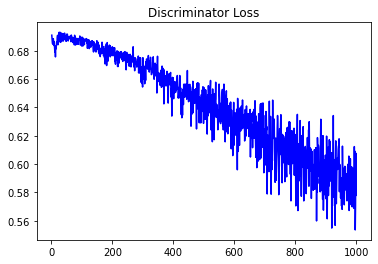

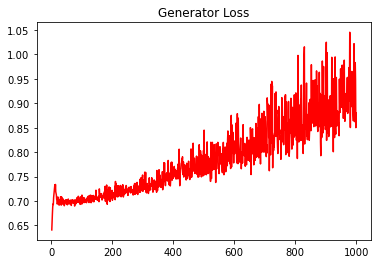

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.528106277666986


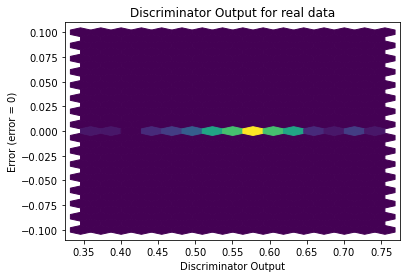

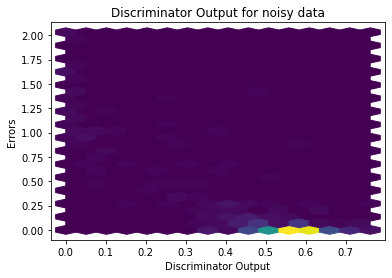

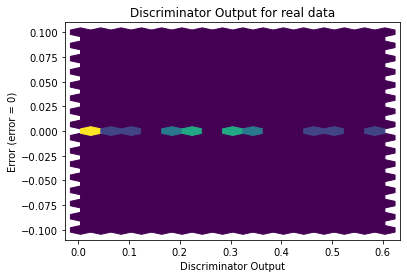

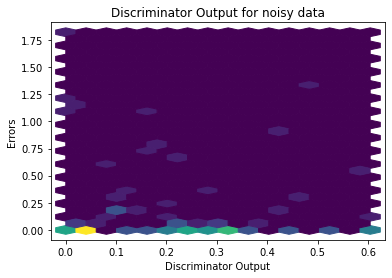

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


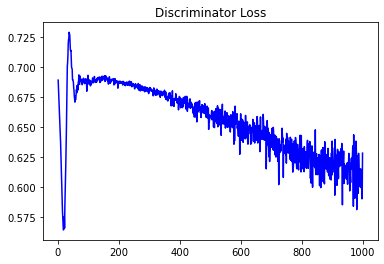

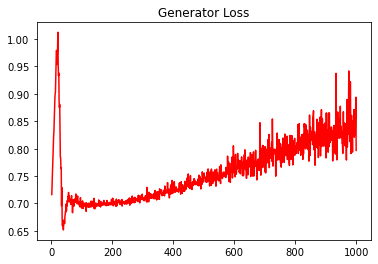

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5419747740924359


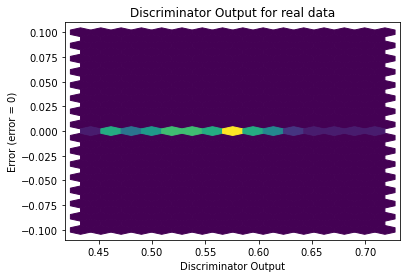

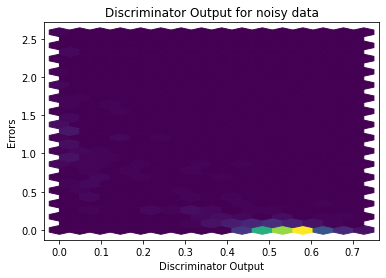

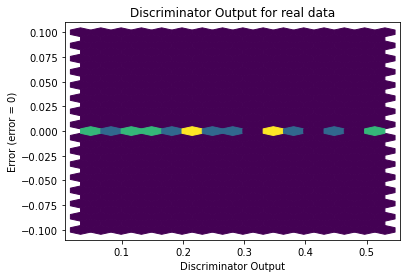

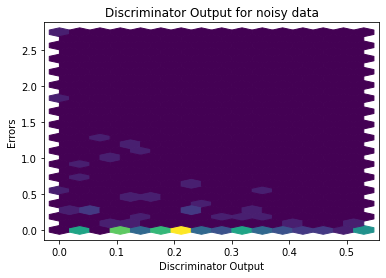

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2128]], requires_grad=True)
